In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
%%HTML
<img src="https://cdn-images-1.medium.com/max/2000/1*2c21SkzJMf3frPXPAR_gZA.png">
<a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51" target="_blank">src</a>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7ea0da2668>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ea0db3048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7ea0da2518>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7ea0db3898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ea0db3cf8>,
 'means': []}

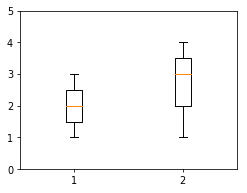

In [6]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
plt.axis([0, 5, 0, 5])
y1 = (1, 2, 3)
y2 = (4, 3, 1)

plt.boxplot([y1, y2])

#### calculate percentile

In [10]:
a = np.array([10,12,23])
np.percentile(a, 50) # return 50th percentile, e.g median.

12.0

In [11]:
np.percentile(a, 99)

22.780000000000001

In [12]:
np.percentile(a, 99.5)

22.890000000000001